In [ ]:
import random
import seaborn as sns

In [2]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
edges = np.load(r"pokec_n dataset\region_job_2_2_edges.npy")
features = np.load(r"pokec_n dataset\region_job_2_2_features.npy")
labels = np.load(r"pokec_n dataset\region_job_2_2_labels.npy")
sens = np.load(r"pokec_n dataset\region_job_2_2_sens.npy")

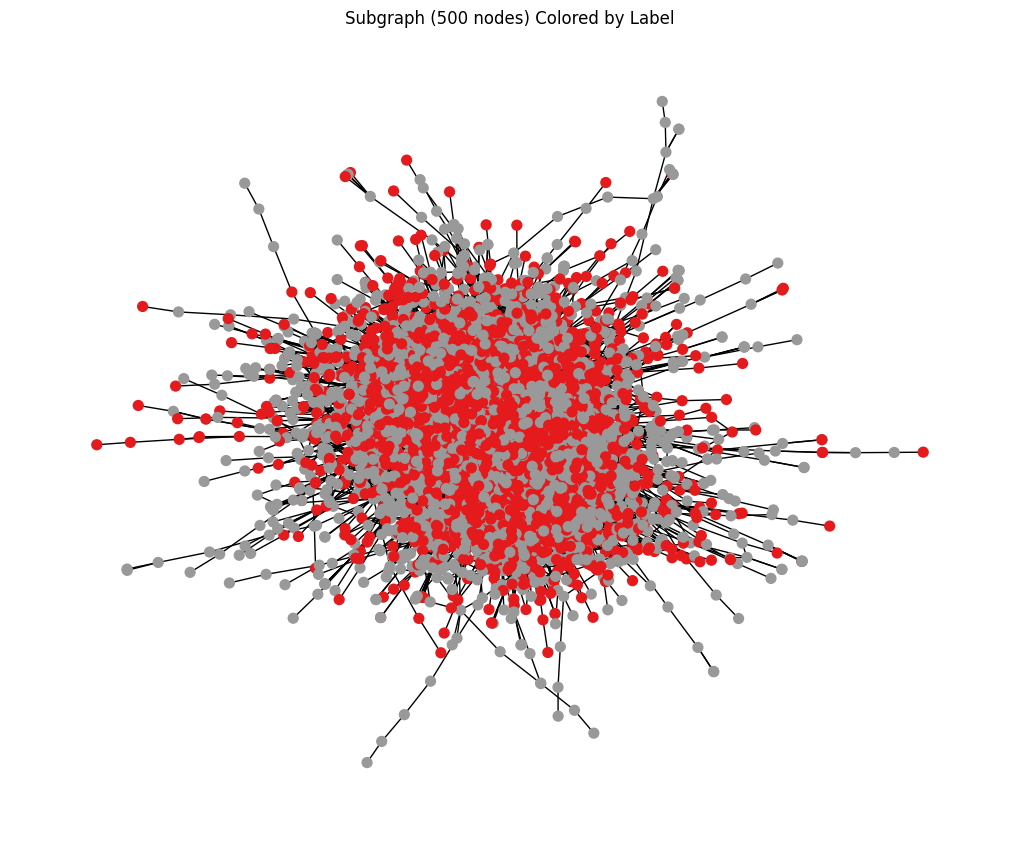

,Node,Label,Sensitive Attribute,Feature (first 5 values)
0,918,0,1,"[0.6336214, -2.314996, -0.9312956, 1.0, 0.2731..."
1,0,1,1,"[0.6336214, 0.41408557, -0.9312956, 1.0, -1.25..."
2,4805,1,1,"[0.6336214, 0.16598724, -0.9312956, 1.0, 0.273..."
3,225,1,0,"[0.6336214, 0.0005883578, 1.0735993, 0.0, -1.2..."
4,1,0,0,"[0.6336214, 0.41408557, 1.0735993, 0.0, -0.085..."
5,897,1,0,"[-1.5779744, 1.1583805, 1.0735993, 0.0, -0.085..."
6,1850,0,0,"[-1.5779744, 1.24108, -0.9312956, 0.0, -1.2516..."
7,2939,1,0,"[0.6336214, 0.0005883578, 1.0735993, 0.0, -0.2..."
8,2356,0,0,"[-1.5779744, 0.57948446, 1.0735993, 0.0, -1.25..."
9,2,0,0,"[0.6336214, 0.41408557, -0.9312956, 0.0, 0.362..."


In [4]:
# Transpose edges to get (source, target) pairs
edge_list = edges.T

# Create the graph
G = nx.Graph()
G.add_edges_from(edge_list)

# Assign node attributes
for i in range(features.shape[0]):
    if i in G:
        G.nodes[i]["feature"] = features[i]
        G.nodes[i]["label"] = int(labels[i])
        G.nodes[i]["sens"] = int(sens[i])

# Draw a subgraph of 500 nodes to avoid rendering issues
subgraph_nodes = list(G.nodes)
G_sub = G.subgraph(subgraph_nodes)
pos = nx.spring_layout(G_sub, seed=42)
colors = [G_sub.nodes[n]['label'] for n in G_sub.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G_sub, pos, node_color=colors, cmap=plt.cm.Set1, node_size=50, with_labels=False)
plt.title("Graph Colored by Label")
plt.show()

# Show a sample of node attributes in a DataFrame
node_data = []
for n, data in list(G.nodes(data=True))[:10]:  # display 10 nodes
    node_data.append({
        "Node": n,
        "Label": data["label"],
        "Sensitive Attribute": data["sens"],
        "Feature (first 5 values)": data["feature"][:5]  # preview features
    })

pd.DataFrame(node_data)

In [5]:
# Count unique values
unique, counts = np.unique(sens, return_counts=True)

# Print them as pairs
for value, count in zip(unique, counts):
    print(f"Sensitive attribute value {value}: {count} nodes")

Sensitive attribute value 0: 4040 nodes
Sensitive attribute value 1: 2145 nodes


In [6]:
# Count unique values
unique, counts = np.unique(labels, return_counts=True)

# Print them as pairs
for value, count in zip(unique, counts):
    print(f"Label value {value}: {count} nodes")

Label value 0: 3432 nodes
Label value 1: 2753 nodes


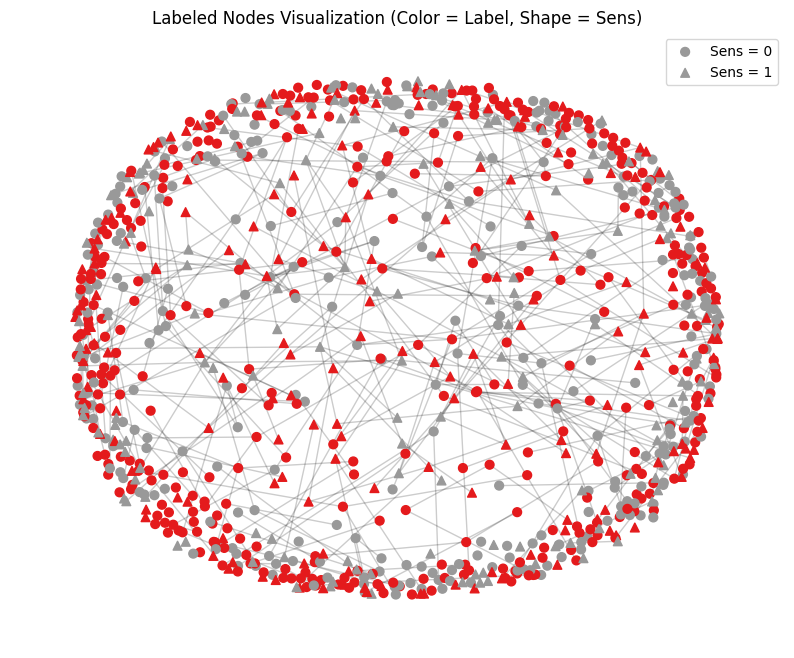

In [18]:
# === Sample a manageable number of labeled+sens nodes for plotting ===
labeled_nodes = list(range(len(labels)))
sampled_nodes = random.sample(list(labeled_nodes), 1000)
G_sample = G.subgraph(sampled_nodes)

# === Prepare layout and plotting ===
pos = nx.spring_layout(G_sample, seed=42, k=0.3)
sens0_nodes = [n for n in G_sample.nodes if G_sample.nodes[n]["sens"] == 0]
sens1_nodes = [n for n in G_sample.nodes if G_sample.nodes[n]["sens"] == 1]
label_colors_0 = [G_sample.nodes[n]["label"] for n in sens0_nodes]
label_colors_1 = [G_sample.nodes[n]["label"] for n in sens1_nodes]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_sample, pos, nodelist=sens0_nodes, node_color=label_colors_0,
                       cmap=plt.cm.Set1, node_size=40,  node_shape='o', label='Sens = 0')
nx.draw_networkx_nodes(G_sample, pos, nodelist=sens1_nodes, node_color=label_colors_1,
                       cmap=plt.cm.Set1, node_shape='^', node_size=40, label='Sens = 1')
nx.draw_networkx_edges(G_sample, pos, alpha=0.2)
plt.legend(scatterpoints=1)
plt.title("Labeled Nodes Visualization (Color = Label, Shape = Sens)")
plt.axis('off')
plt.show()

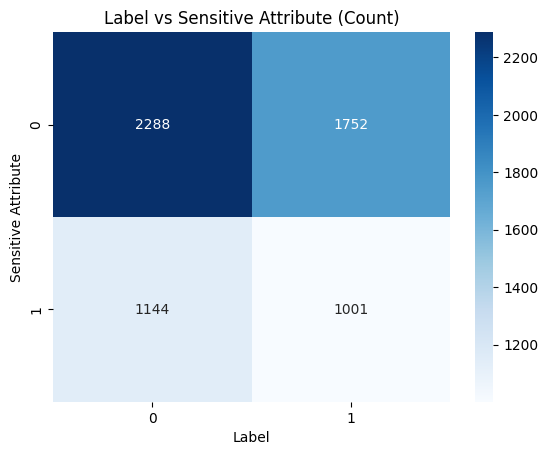

In [21]:
sns.heatmap(pd.crosstab(df['sens'], df['label']),
            annot=True,
            fmt='d',           # <-- this sets integer format (no sci notation)
            cmap='Blues')

plt.title("Label vs Sensitive Attribute (Count)")
plt.xlabel("Label")
plt.ylabel("Sensitive Attribute")
plt.show()



In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Construct the contingency table
table = np.array([
    [2300, 1800],
    [1100, 1000]
])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

# the result is statistically significant- the distribution of labels likely differs between the two sensitive groups

Chi2 statistic: 7.5962
p-value: 0.0058
